# **Predicting Concrete Strength**

## **Introduction**

The construction industry, which can be divided into several subsegments such as civil engineering construction, building construction, and specialized construction, is one of the most thriving industries in the world. The market size of the U.S. construction sector was valued at around 1.8 trillion U.S. dollars in 2022 ([reference](https://www.statista.com/topics/974/construction/)). Concrete strength is a fundamental pillar of the construction industry, underpinning the stability, durability, and safety of structures. The ability of concrete to resist compressive forces is crucial for ensuring the structural integrity of buildings, bridges, and various infrastructure projects. Understanding what makes concrete strong and finding ways to make it even better is vital for long-lasting and cost-effective construction.

## **Problem Statement**

The goal is to develop a data-driven model that accurately forecasts concrete strength based on the composition and curing time. This predictive capability not only facilitates efficient design and construction processes but also contributes to the overarching objective of constructing safer, more durable, and cost-effective structures. The project seeks to provide insights that empower the construction industry to make informed decisions, optimize material usage, and ensure the reliability of concrete in diverse applications.

# **Data Source and Variables**

The dataset is extracted from UCI repository and can be accessed from ([here](https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength))

Information about variables:

Name -- Data Type -- Measurement -- Description

Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable

Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable

Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable

Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable

Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable

Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable

Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable

Age -- quantitative -- Day (1~365) -- Input Variable

Concrete compressive strength -- quantitative -- MPa -- Output Variable


In [1]:
# loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading dataset
df = pd.read_excel("Concrete_Data.xls", sheet_name="Sheet1")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

## **Data Cleaning**

In [4]:
# Changing the column names as they are too long and make them convinient to work with
df.columns = ["Cement", "Blast Furnace Slag","Fly Ash", "Water", "Superplasticizer","Coarse Aggregate","Fine Aggregate"," Age","Concrete_comp_strength"]
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete_comp_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [5]:
#checking for null values
df.isnull().sum()

Cement                    0
Blast Furnace Slag        0
Fly Ash                   0
Water                     0
Superplasticizer          0
Coarse Aggregate          0
Fine Aggregate            0
 Age                      0
Concrete_comp_strength    0
dtype: int64

data has no null values

In [6]:
# checking for duplicates
df.duplicated().sum()

25

In [7]:
df[df.duplicated()]

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete_comp_strength
77,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.398217
80,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.398217
86,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.301171
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.301171
91,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.301171
100,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.201007
103,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.201007
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.895819
111,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.895819
123,425.0,106.3,0.0,153.5,16.5,852.1,887.1,28,60.294676


In [8]:
#dropping duplicate rows and storing in new dataframe
df1 = df.drop_duplicates().reset_index(drop=True)
df1

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete_comp_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1000,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1001,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1002,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1003,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


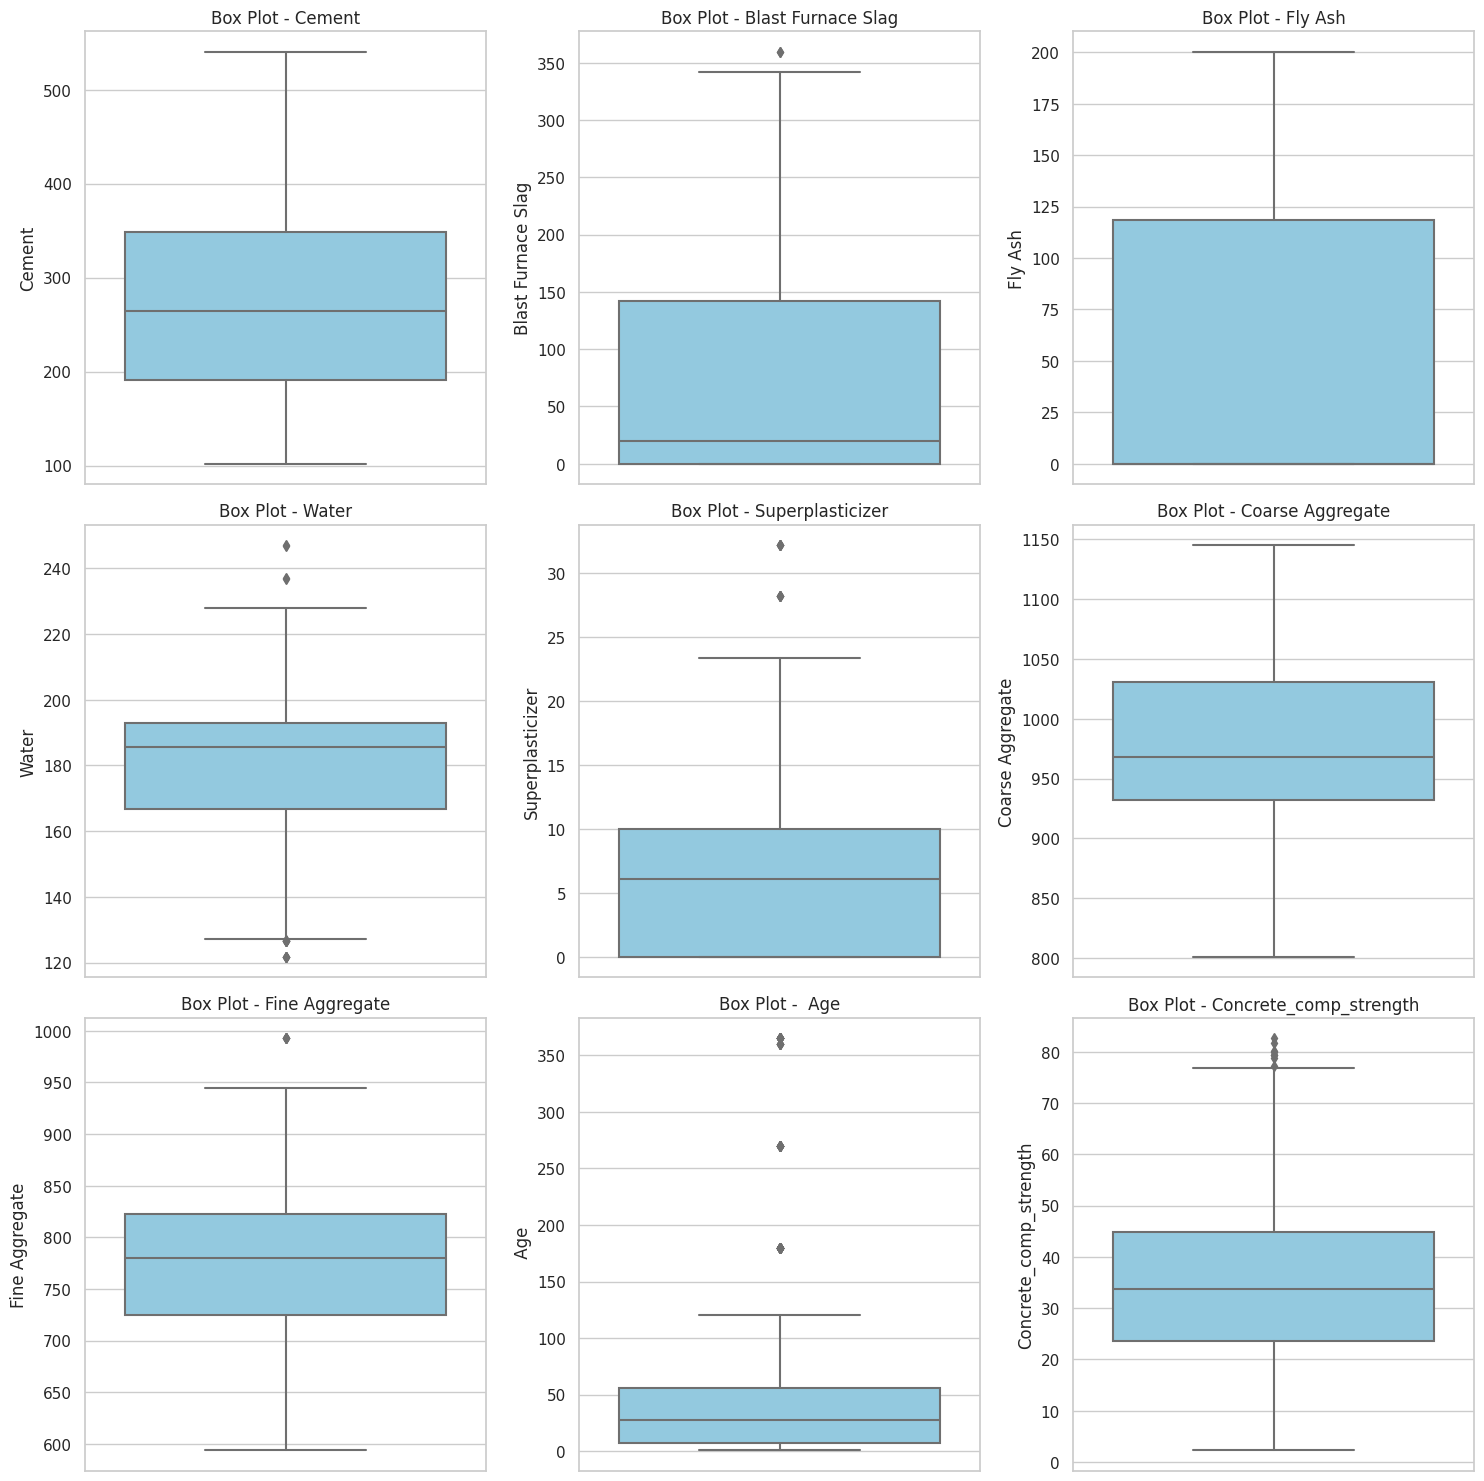

In [9]:
# checking for outliers
sns.set(style="whitegrid")

# Create subplots for each variable
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Loop through the variables and create box plots
for i, var in enumerate(df1.columns):
    sns.boxplot(y=df1[var], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Box Plot - {var}')

# Adjust layout
plt.tight_layout()
plt.show()

It seems that age has outliers like some instances have have age above 150 days but actually studies ([shows](https://doi.org/10.1016/j.matpr.2023.06.403)) that compressive strength of concrete increases with the age. Concrete age above 150 days might be relevant for specialized projects or for assessing the long-term durability of structures  

## **Data Distribution and Relationships**

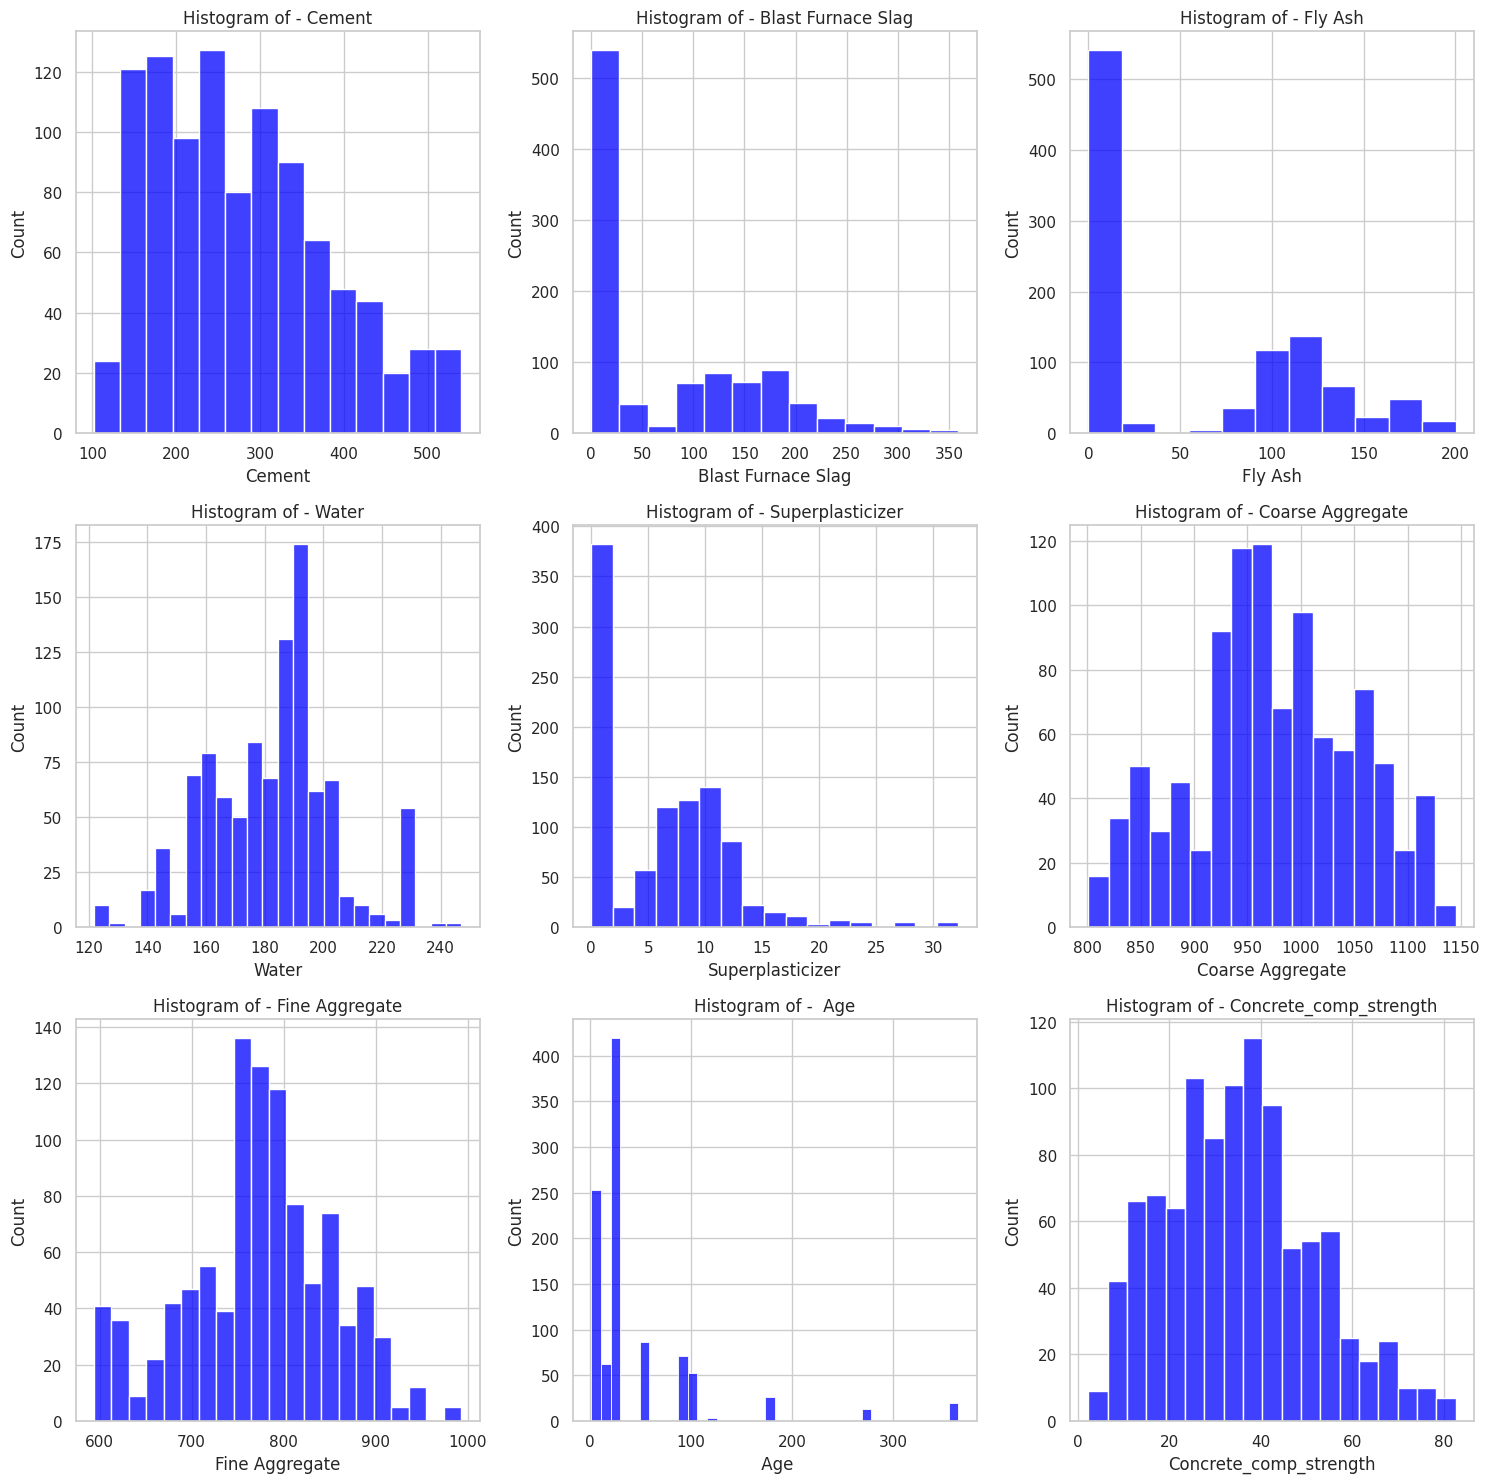

In [10]:
# checking the distribution of features
#sns.set(style="whitegrid")

# Create subplots for each variable
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Loop through the variables to create histogram
for i, var in enumerate(df1.columns):
    sns.histplot(x=df1[var], ax=axes[i], color='blue')

    axes[i].set_title(f'Histogram of - {var}')

# Adjust layout
plt.tight_layout()
plt.show()

Most values falls around zero in blast furance slag, fly ash and superplasticizer

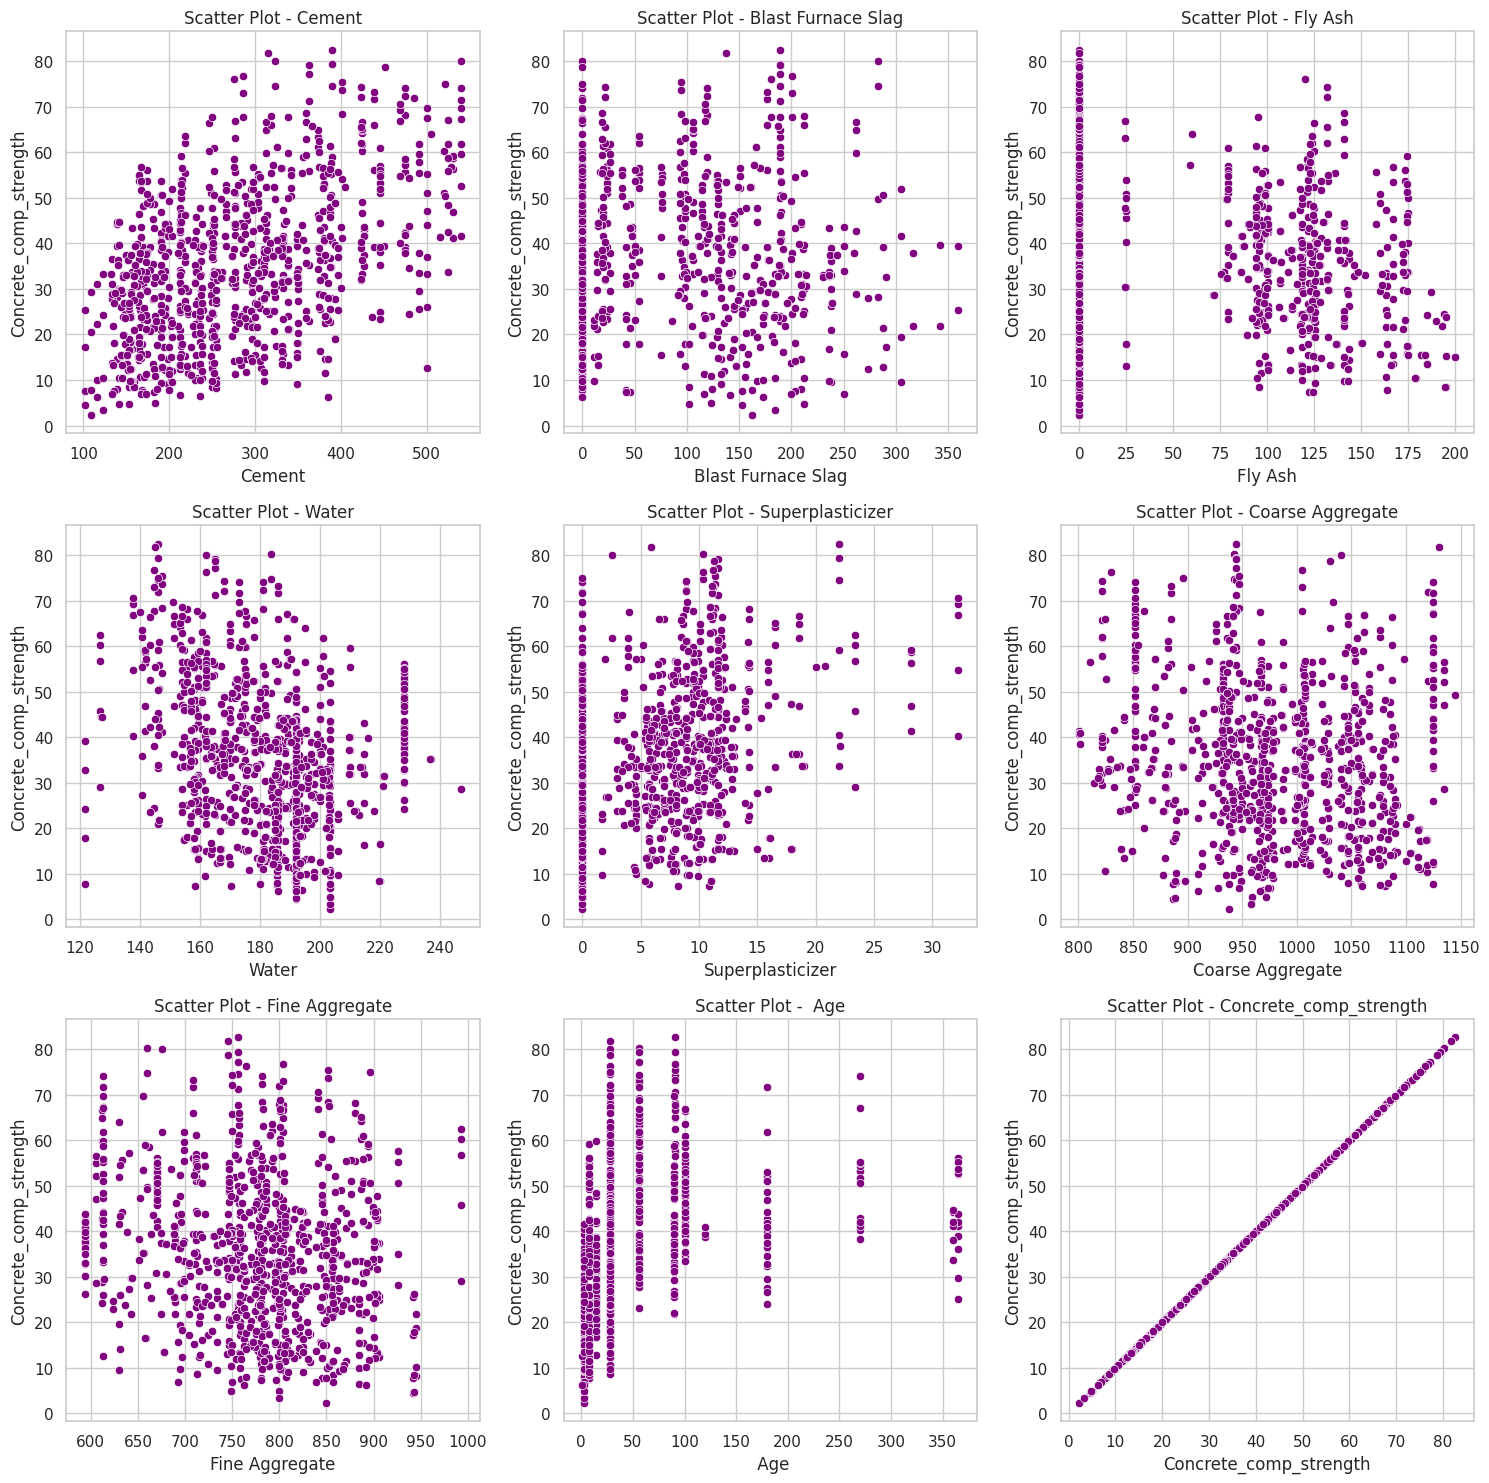

In [11]:
# Checking the relationship between predictors and target variable
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Loop through the variables and create scatter plots
for i, var in enumerate(df1.columns):
    sns.scatterplot(data = df1, x=df1[var], y = df1["Concrete_comp_strength"], ax=axes[i], color='purple')

    axes[i].set_title(f'Scatter Plot - {var}')

# Adjust layout
plt.tight_layout()
plt.show()

Cement and concrete strength has positive relationship as evident in first subplot, rest of the predictors have some kind of relationship with concrete strength but it seems like most of them have non-linear relationships

<ipython-input-40-714306b78869>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['age_category'] = pd.cut(df_age[' Age'], bins=bins, labels=labels, right=False)


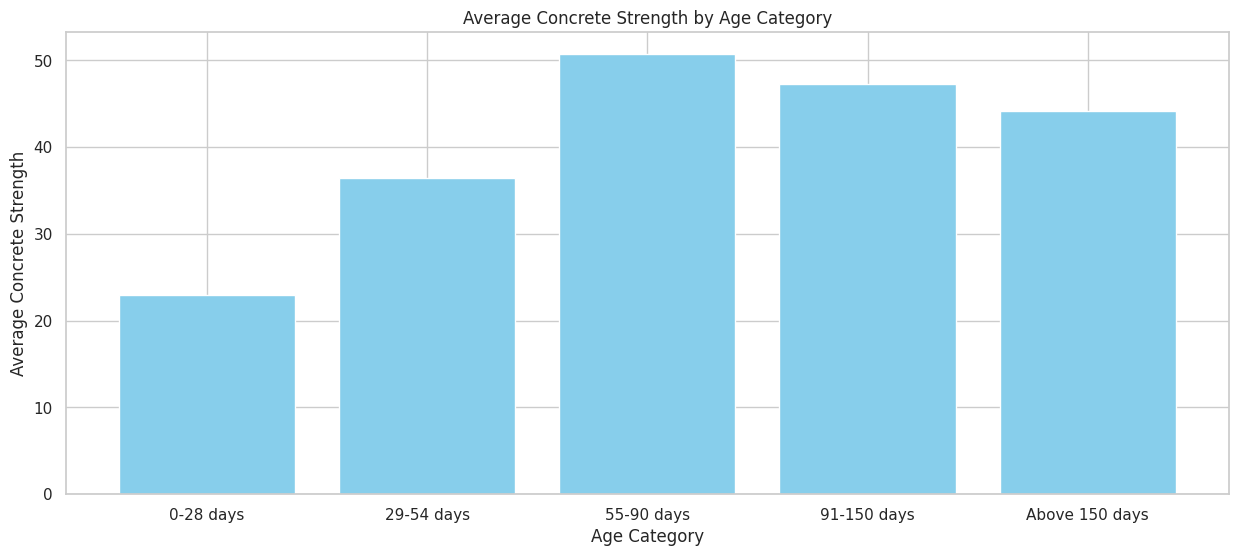

In [40]:
df_age = df1[[" Age","Concrete_comp_strength"]]
bins = [0, 28, 54, 90, 150, float('inf')]  # age categories in days
labels = ['0-28 days', '29-54 days', '55-90 days', '91-150 days', 'Above 150 days']

# Add a new column 'age_category' to the DataFrame
df_age['age_category'] = pd.cut(df_age[' Age'], bins=bins, labels=labels, right=False)

# Group by 'age_category' and calculate the average concrete strength for each group
grouped_data = df_age.groupby('age_category')["Concrete_comp_strength"].mean().reset_index()

# Plot the results in a bar plot
plt.figure(figsize=(15, 6))
plt.bar(grouped_data['age_category'], grouped_data["Concrete_comp_strength"], color='skyblue')
plt.xlabel('Age Category')
plt.ylabel('Average Concrete Strength')
plt.title('Average Concrete Strength by Age Category')
plt.show()

<ipython-input-47-b563081e352b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cement['cement_category'] = pd.cut(df_cement['Cement'], bins=bins, labels=labels, right=False)


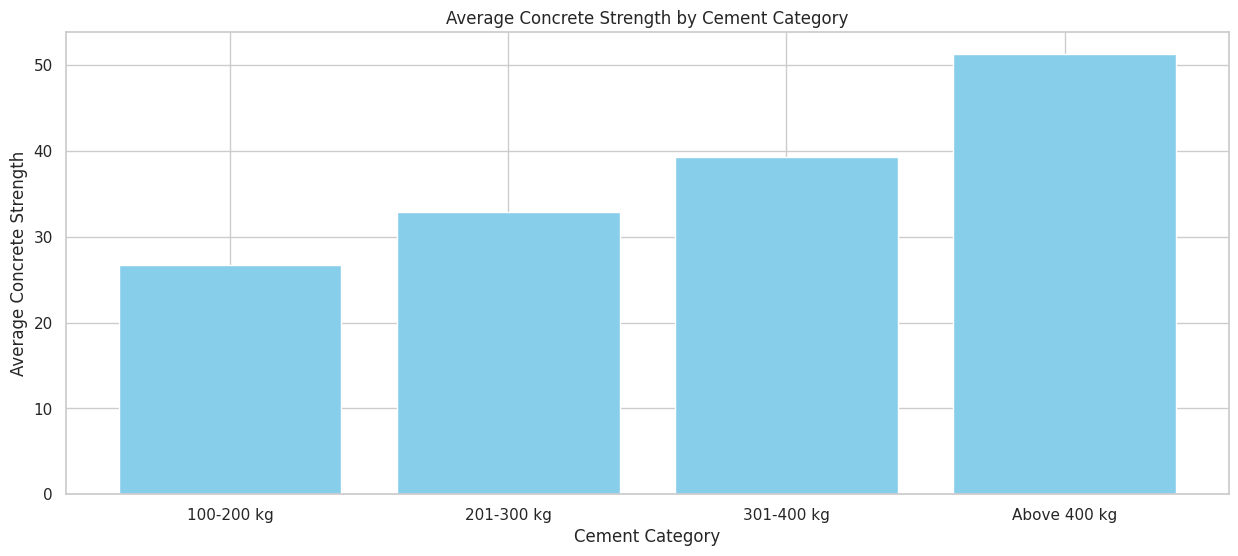

In [47]:
df_cement = df1[["Cement","Concrete_comp_strength"]]
bins = [100, 200 , 300, 400,  float('inf')]
labels = ['100-200 kg', '201-300 kg', '301-400 kg',  'Above 400 kg']

# Add a new column 'age_category' to the DataFrame
df_cement['cement_category'] = pd.cut(df_cement['Cement'], bins=bins, labels=labels, right=False)

# Group by 'age_category' and calculate the average concrete strength for each group
grouped_data = df_cement.groupby('cement_category')["Concrete_comp_strength"].mean().reset_index()

# Plot the results in a bar plot
plt.figure(figsize=(15, 6))
plt.bar(grouped_data['cement_category'], grouped_data["Concrete_comp_strength"], color='skyblue')
plt.xlabel('Cement Category')
plt.ylabel('Average Concrete Strength')
plt.title('Average Concrete Strength by Cement Category')
plt.show()

<ipython-input-55-b14798b1d33a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_water['water_category'] = pd.cut(df_water['Water'], bins=bins, labels=labels, right=False)


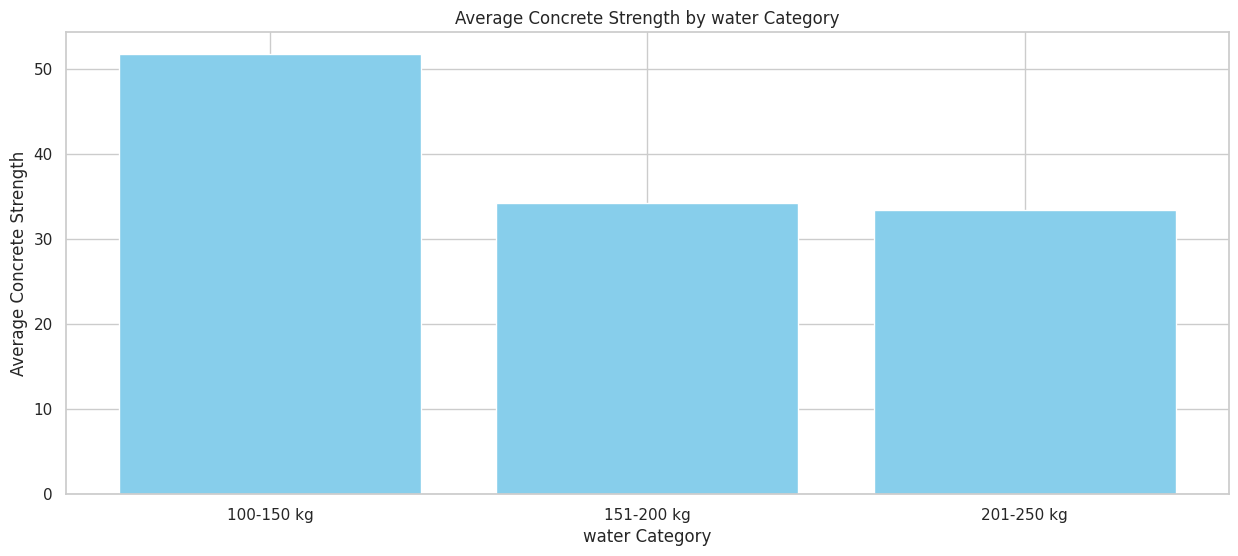

In [55]:
df_water = df1[["Water","Concrete_comp_strength"]]
bins = [100, 150 , 200, 250]
labels = ['100-150 kg', '151-200 kg', '201-250 kg']

# Add a new column 'age_category' to the DataFrame
df_water['water_category'] = pd.cut(df_water['Water'], bins=bins, labels=labels, right=False)

# Group by 'age_category' and calculate the average concrete strength for each group
grouped_data = df_water.groupby('water_category')["Concrete_comp_strength"].mean().reset_index()

# Plot the results in a bar plot
plt.figure(figsize=(15, 6))
plt.bar(grouped_data['water_category'], grouped_data["Concrete_comp_strength"], color='skyblue')
plt.xlabel('water Category')
plt.ylabel('Average Concrete Strength')
plt.title('Average Concrete Strength by water Category')
plt.show()

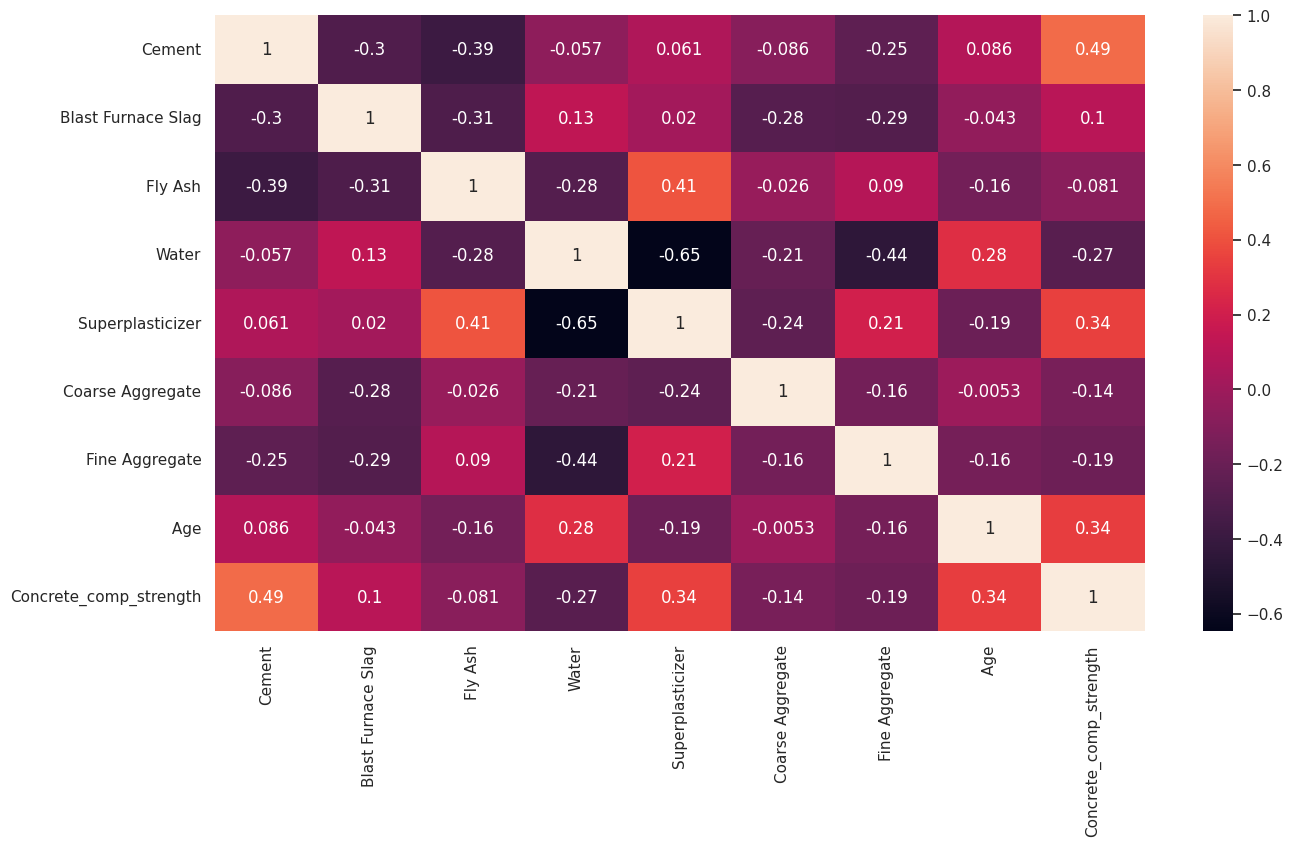

In [12]:
plt.figure(figsize=(15,8))
sns.heatmap(df1.corr(),annot=True)
plt.show()

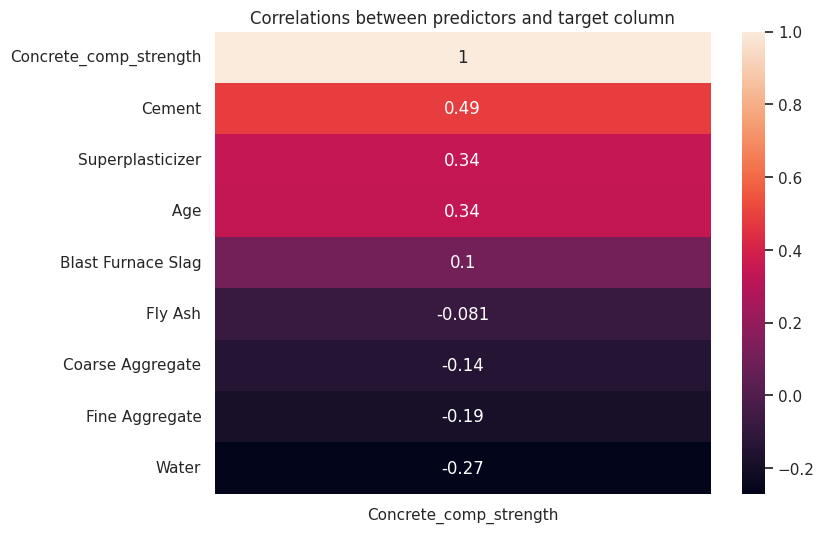

In [13]:
#plotting the correlation of predictors with target variable
corr = df1.corr()
target_col=corr[['Concrete_comp_strength']].sort_values(by='Concrete_comp_strength', ascending=False)

plt.figure(figsize=(8,6))

sns.heatmap(target_col,annot=True)
plt.title("Correlations between predictors and target column")
plt.show()

Cement, superplasticizer, and age exhibit a moderate correlation with the target variable, while the remaining predictors demonstrate low correlation. However, it's important to note that correlation measures linear dependency, and the observed patterns(in above scatter plots) may indicate the presence of non-linear relationships between the predictors and the target variable.

## **Modelling**

In [14]:
# first lets try linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [15]:
x = df1.drop("Concrete_comp_strength", axis = 1)
y = df1["Concrete_comp_strength"]
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state= 10)


In [30]:
#scaling the data
scalar = StandardScaler()

X_train_sc = scalar.fit_transform(x_train)
X_test_sc = scalar.transform(x_test)



In [18]:
rmse =[]
r_2 =[]

In [19]:
reg = LinearRegression()
reg.fit(X_train_sc, y_train)
y_pred_reg = reg.predict(X_test_sc)

mse_reg = mean_squared_error(y_test,y_pred_reg)
rmse_reg = np.sqrt(mse_reg)
print(f'MSE for Linear regression {mse_reg}')
print(f'RMSE for Linear regression {rmse_reg}')
rmse.append(f'RMSE for Linear Regression{rmse_reg}')
r2 = reg.score(X_test_sc, y_test)
r_2.append(f'r2 for linear regression {r2}')

MSE for Linear regression 89.17067879191006
RMSE for Linear regression 9.443022757142442


The high mean squared error (MSE) and root mean squared error (RMSE) values for linear regression indicate that this model is not well-suited to the data. In such cases, machine learning models offer a more advantageous approach, as they do not make assumptions about the underlying data structure and can effectively capture the non-linear relationships between the predictors and the target variable.

## **ML Models**

* KNN
* SVR
* Random Forest
* XGBoost

In [20]:

from sklearn.svm import SVR
from sklearn.model_selection import  GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

**Hyperparameter tuning**

In [ ]:
estimator_knn = KNeighborsRegressor()
param_grid_knn ={ "n_neighbors": range(2,101,2),
"metric": ["manhattan","minkowski"],
"weights": ["uniform", "distance"] }

gscv_knn = GridSearchCV(estimator=estimator_knn,param_grid=param_grid_knn)
gscv_knn.fit(X_train_sc,y_train)
print("KNN: Best : %f using: %s" % (gscv_knn.best_score_,gscv_knn.best_params_))

In [ ]:
# rf
estimator_rf  = RandomForestRegressor(random_state = 0)
param_grid_rf = {'n_estimators': np.arange(50, 500, 50),
              'min_samples_split': np.arange(5, 30, 5),
              'max_depth': np.arange(2,7) }

gscv_rf = GridSearchCV(estimator=estimator_rf,param_grid=param_grid_rf)
gscv_rf.fit(x_train,y_train)
print("RF: Best : %f using: %s" % (gscv_rf.best_score_,gscv_rf.best_params_))


In [ ]:
#gradient boosting
param_grid_gb = {'n_estimators': np.arange(100, 500, 100),
              'learning_rate': [0.01, 0.1, 1],
              'max_depth': np.arange(2,7)}
estimator_gb = GradientBoostingRegressor(random_state=0)

#finding values
gscv_gb = GridSearchCV(estimator= estimator_gb, param_grid=param_grid_gb,scoring='neg_mean_squared_error')
gscv_gb.fit(x_train,y_train)
print("GB: Best : %f using: %s" % (gscv_gb.best_score_,gscv_gb.best_params_))

In [ ]:
# define the SVR model
svr_model = SVR(kernel='rbf')

# specify the hyperparameter search space
hyperparameters = {
    'C': [0.01,0.1,0.3,0.5,1,3,5,10,20,30,40,50,60,70,80,90,100],
    'epsilon': [ 0.001,0.005,0.01, 0.05,0.1, 0.2,0.3,0.5,1],
    'gamma': [0.001,0.005,0.01,0.05,0.1,0.3,0.5,0.8,1]
}

# create a time series split for cross-validation

grid_search = GridSearchCV(svr_model, hyperparameters)
grid_search.fit(X_train_sc, y_train)
print("Best : %f using: %s" % (grid_search.best_score_,grid_search.best_params_))

In [21]:
knn = KNeighborsRegressor(metric= 'minkowski', n_neighbors = 4, weights= 'distance')
rf =  RandomForestRegressor(max_depth = 6, min_samples_split = 5, n_estimators = 350, random_state = 0)
gb = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 4, n_estimators = 400, random_state=0)
svr = SVR(C= 100, gamma = 0.1, epsilon = 1 )


In [22]:
knn.fit(X_train_sc, y_train)
pred_knn = knn.predict(X_test_sc)
mse_knn = mean_squared_error(y_test, pred_knn)
rmse_knn = np.sqrt(mse_knn)
r_2_knn = r2_score(y_test,pred_knn)
rmse.append(f'RMSE for KNN = {rmse_knn}')
r_2.append(f'R2 for KNN = {r_2_knn}')

svr.fit(X_train_sc, y_train)
pred_svr = svr.predict(X_test_sc)
mse_svr = mean_squared_error(y_test, pred_svr)
rmse_svr = np.sqrt(mse_svr)
r_2_svr = r2_score(y_test,pred_svr)
rmse.append(f'RMSE for SVR = {rmse_svr}')
r_2.append(f'R2 for SVR = {r_2_svr}')

rf.fit(x_train, y_train)
pred_rf = rf.predict(x_test)
mse_rf = mean_squared_error(y_test, pred_rf)
rmse_rf = np.sqrt(mse_rf)
r_2_rf = r2_score(y_test,pred_rf)
rmse.append(f'RMSE for RF = {rmse_rf}')
r_2.append(f'R2 for RF = {r_2_rf}')

gb.fit(x_train, y_train)
pred_gb = gb.predict(x_test)
mse_gb = mean_squared_error(y_test, pred_gb)
rmse_gb = np.sqrt(mse_gb)
r_2_gb = r2_score(y_test,pred_gb)
rmse.append(f'RMSE for GB = {rmse_gb}')
r_2.append(f'R2 for GB = {r_2_gb}')

print(rmse)
print(r_2)

['RMSE for Linear Regression9.443022757142442', 'RMSE for KNN = 7.88102668018918', 'RMSE for SVR = 5.303040525233542', 'RMSE for RF = 5.995532399116953', 'RMSE for GB = 5.119316153985288']
['r2 for linear regression 0.6422265413538715', 'R2 for KNN = 0.7507979318432055', 'R2 for SVR = 0.8871670510861831', 'R2 for RF = 0.8557746654144092', 'R2 for GB = 0.8948498372977816']


Among the tested models, the Gradient Boosting Regressor exhibits good performance with a low root mean square error (RMSE) of 5.11, marking the best result achieved. Furthermore, it achieves the highest R2 score of 0.89, reinforcing its efficacy in capturing the variance in the data.

**Feature Importance**

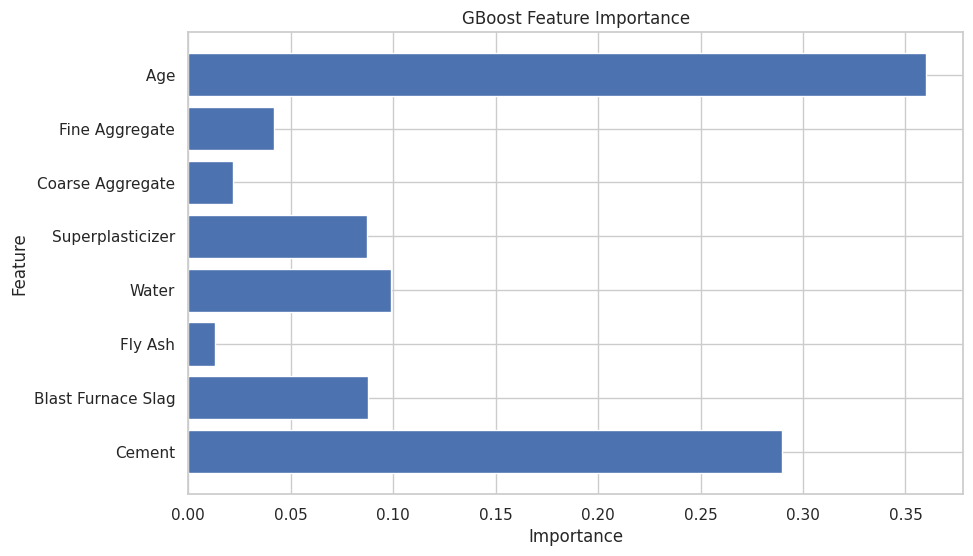

In [23]:
# Feature Importance
feature_importance = gb.feature_importances_
feature_names = x.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance, align='center')
plt.title('GBoost Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [24]:
# dropping the features with less importnace and checking the impact on model performance
x_imp = x.drop(["Coarse Aggregate", "Fly Ash"], axis =1)
x_train_imp,x_test_imp, y_train_imp,y_test_imp = train_test_split(x_imp,y, test_size = 0.2, random_state = 80)
gb.fit(x_train_imp, y_train_imp)
pred_gb_imp = gb.predict(x_test_imp)
mse_gb_imp = mean_squared_error(y_test_imp, pred_gb_imp)
rmse_gb_imp = np.sqrt(mse_gb_imp)
r_2_gb_imp = r2_score(y_test_imp,pred_gb_imp)
print(f'RMSE for GBoost with Important Features {rmse_gb_imp}')
print(f'R2 for GBoost with Important Features {r_2_gb_imp}')

RMSE for GBoost with Important Features 4.548015108630129
R2 for GBoost with Important Features 0.9243246914635003


In [25]:
scores = {'Algorithms' : ["LinearReg", "KNN", "SVR","RF","GBoost", 'GBoost_imp_fea'],
          "RMSE": [rmse_reg, rmse_knn, rmse_svr, rmse_rf, rmse_gb, rmse_gb_imp],
          'R2': [r2, r_2_knn, r_2_svr, r_2_rf, r_2_gb, r_2_gb_imp]}
df_scores = pd.DataFrame(scores)
df_scores

,Algorithms,RMSE,R2
0,LinearReg,9.443023,0.642227
1,KNN,7.881027,0.750798
2,SVR,5.303041,0.887167
3,RF,5.995532,0.855775
4,GBoost,5.119316,0.894850
5,GBoost_imp_fea,4.548015,0.924325


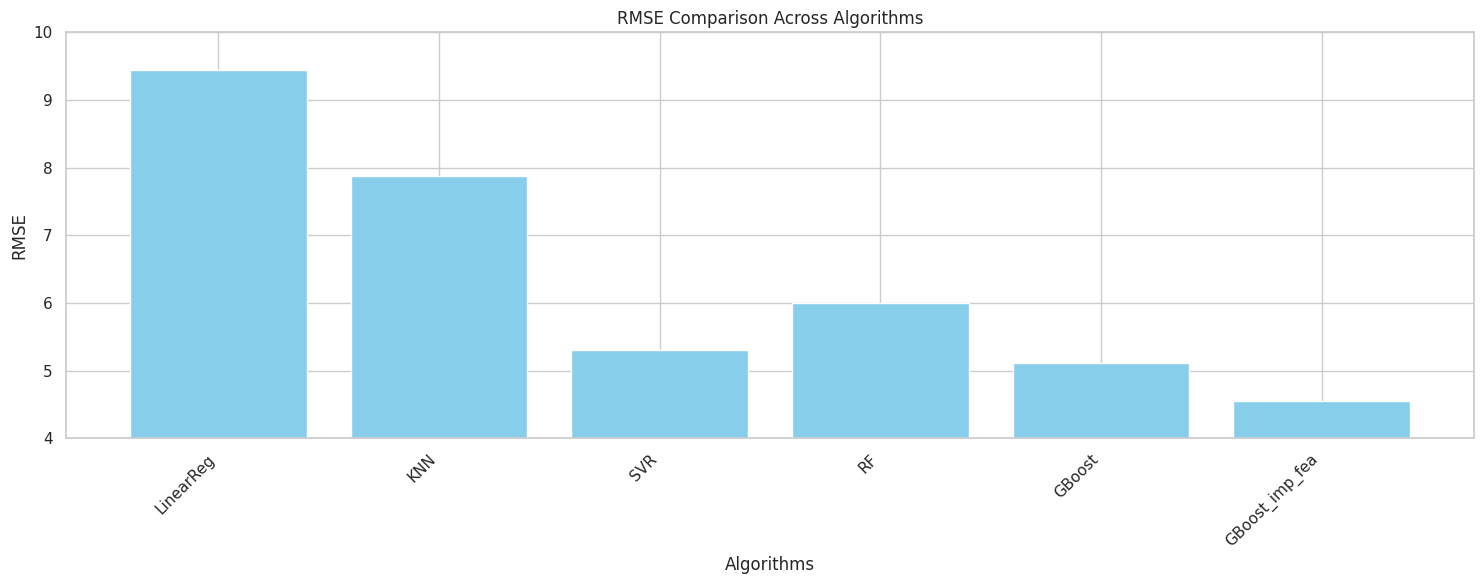

In [26]:

plt.figure(figsize=(15, 6))
plt.bar(df_scores["Algorithms"], df_scores["RMSE"], color='skyblue')
plt.xlabel('Algorithms')
plt.ylabel('RMSE')
plt.title('RMSE Comparison Across Algorithms')
plt.ylim(4,10)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

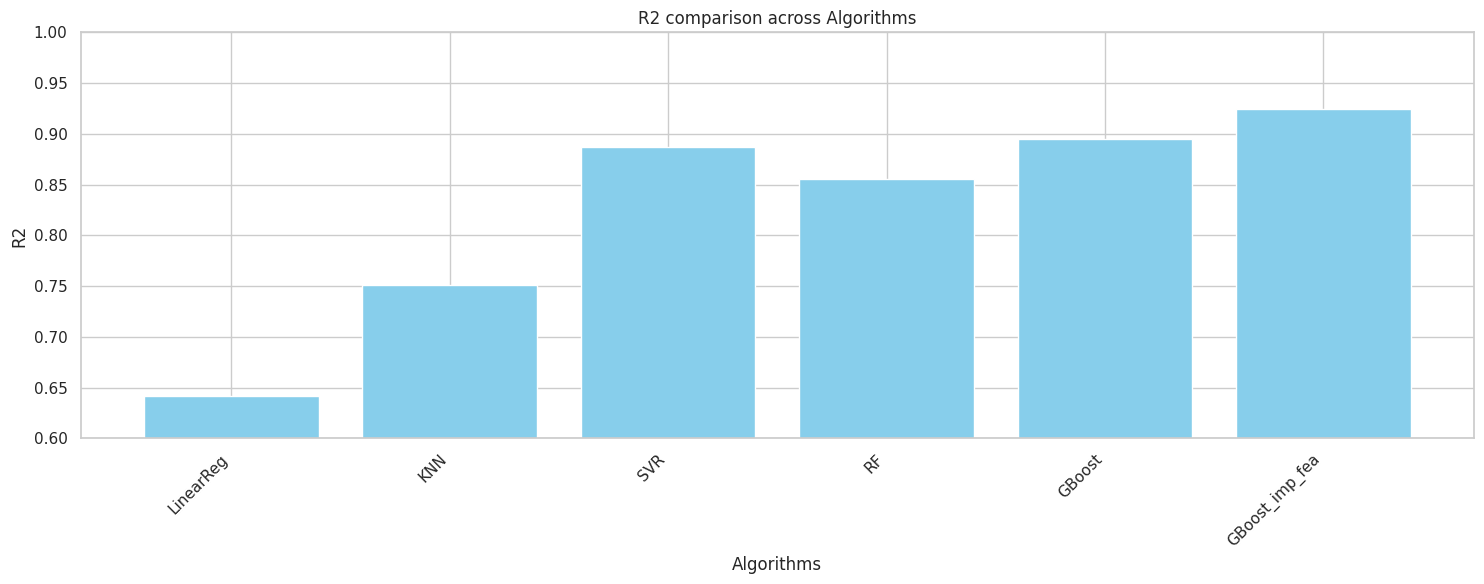

In [27]:
plt.figure(figsize=(15, 6))
plt.bar(df_scores["Algorithms"], df_scores["R2"], color='skyblue')
plt.xlabel('Algorithms')
plt.ylabel('R2')
plt.title('R2 comparison across Algorithms')
plt.ylim(0.6,1)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

After excluding less important features such as Coarse Aggregate and Fly Ash, the performance of the Gradient Boosting Regressor has notably improved. The root mean square error (RMSE) has decreased to 4.54, surpassing the previous benchmark of 5.11. Additionally, the R2 score has shown significant improvement, increasing to 0.92 compared to the previous benchmark of 0.89. Consequently, the Gradient Boosting Regressor, now utilizing the selected important features, stands out as the preferred and final model for the task.

## **Conclusion**

The project has reached its target with the identification of the optimal model—Gradient Boosting Regressor. This finely-tuned model achieved an impressive performance with a root mean square error (RMSE) of 4.54 and an R2 score of 0.92. The model underwent fine-tuning with specific parameters, including a learning rate of 0.1, a maximum depth of 4, and 400 estimators. The influential factors impacting concrete strength, such as cement, age, water, superplasticizer, blast furnace slag, and fine aggregate, played a crucial role in refining the model's predictive accuracy

## **Recommendations**

As concrete strength is one of the important pillar in contruction industry following are the recommendations based on the analysis of given data

* The concrete's age, measured in the number of days , significantly impacts its strength. Analysis reveals that concrete with an age exceeding 54 days exhibits a notable increase in strength, so more than 54 days should be given in oreder to increase strength ideally 90 days .

*  Analysis, reveals that the amount of cement in the concrete mixture is crucial. Specifically, when the cement content exceeds 300 kg per cubic meter, there is a noticeable increase in concrete compressive strength, thereby enhancing overall strength, so recommended to use more than 300 kg of cement in concrete mixture

* Concrete strength is observed to be higher when the water content falls within the range of 100 to 150 kg per cubic meter. Consequently, considering a lower water content is advisable for optimal concrete strength.